In [1]:
# create some simulated classification data
import numpy
numpy.random.seed(1)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=400, n_features=10, n_classes=2)

# Split the dataset into training set and test set with a 0.7-0.3 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Using TensorFlow backend.


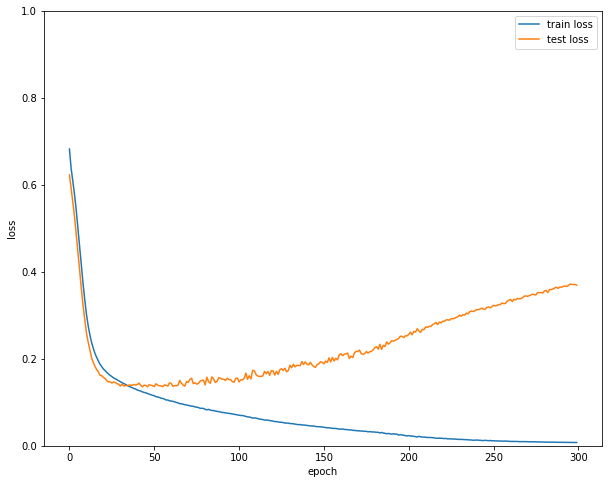

In [2]:
# 1
#Define your model 
from keras.models import Sequential
from keras.layers import Dense, Activation

numpy.random.seed(1)

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=5, verbose=0)

# import require packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

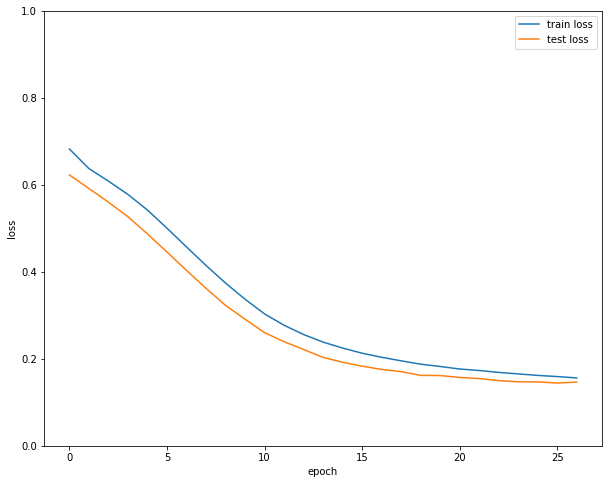

In [3]:
# 2
#Define your model with early stopping on test error
from keras.callbacks import EarlyStopping
numpy.random.seed(1)

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model.compile(optimizer='sgd', loss='binary_crossentropy')
# define the early stopping callback
es_callback = EarlyStopping(monitor='val_loss', mode='min')
# train the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=5, callbacks=[es_callback], verbose=0)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

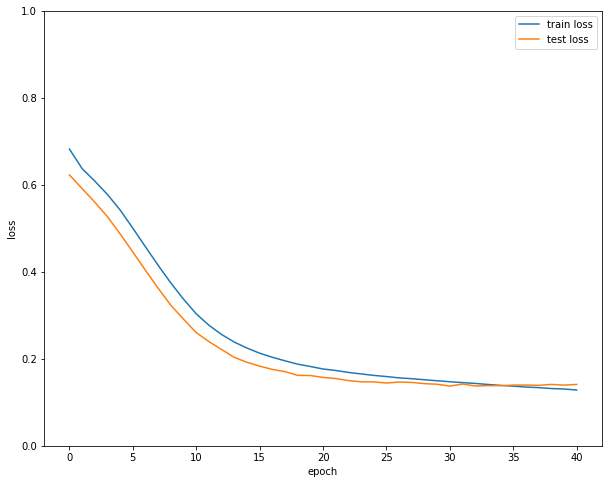

In [4]:
# 2
#Define your model with early stopping on test error with patience=10
from keras.callbacks import EarlyStopping
numpy.random.seed(1)

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=10))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model.compile(optimizer='sgd', loss='binary_crossentropy')
# define the early stopping callback
es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# train the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=5, callbacks=[es_callback], verbose=0)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')